In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (10,10)

## Ejercicio 10:
### Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 3.
### Analizar el resultado del mismo, e indicar si la distribución puede o no ser aceptada.
### Considerar un nivel de significación del 1%.
### En caso que la distribución de probabilidades no pase el test con un nivel de significación del 1% volver a realizarlo con un nivel de significación del 5%.

In [4]:
SEED = np.floor((100680+101046+101018+100490) / 4)

In [5]:
def dens_normal(sigma, mu, x):
    a = 1/(sigma*np.sqrt(2*np.pi))
    b = np.exp(-((x-mu)**2)/(2*sigma**2))
    return a*b

def dens_exp(lbda, x):
    return lbda * 1*np.exp(-lbda * abs(x))

In [6]:
#Para aceptar o rechazar
c = 75/5

def aceptar(x):
    u = np.random.rand()
    a = dens_normal(np.sqrt(3), 15, x)/ (c * (dens_exp(1/15, x)))
    return u < a
    
    

In [7]:
cant_gen = 0
rechazados = 0
gen = []
while (cant_gen < 100000):
    x = np.random.exponential(scale = 15, size = 1)[0] #scale = 1/lambda
    u = np.random.rand()
    if (u < 0.5):
        x = -x
    if (aceptar(x)):
        cant_gen+=1
        gen.append(x)
    else: 
        rechazados+=1

### El test de kolmogorov smirnov consiste en hallar el la maxima diferencia en modulo entre la funcion de distribucion de probabilidad acumulada real contra la funcion de distribucion de probabilidad acumulada empirica que tiene la muestra.

In [8]:
len(gen)

100000

In [9]:
gen = sorted(gen)

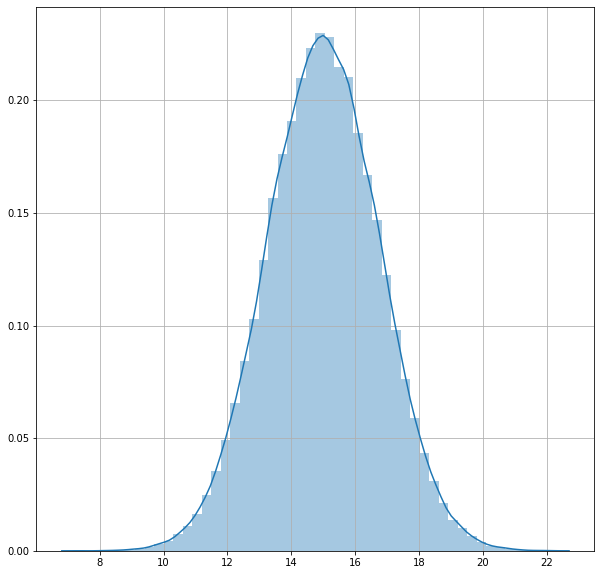

In [16]:
sns.distplot(gen)
plt.grid();

## Test:

In [21]:
max_dif = 0
aux = 0
for i in range(len(gen)):
    aux = abs( ((i+1)/len(gen)) - (norm.cdf(gen[i], loc = 15, scale = 3)) )
    if ( aux > max_dif):
        max_dif = aux
max_dif

0.1297559727018518

## Mismo test usando Scipy

In [26]:
kstest(gen, 'norm', args=(15, 3))

KstestResult(statistic=0.12976597270185178, pvalue=0.0)

## Nuevamente el p-valor es muy cercano a 0 por lo que la distribucion es aceptada con un nivel de significacion del 1% (o del 0.0000000000000000001%)